In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
iris_df["species"] = iris.target_names[iris.target]

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


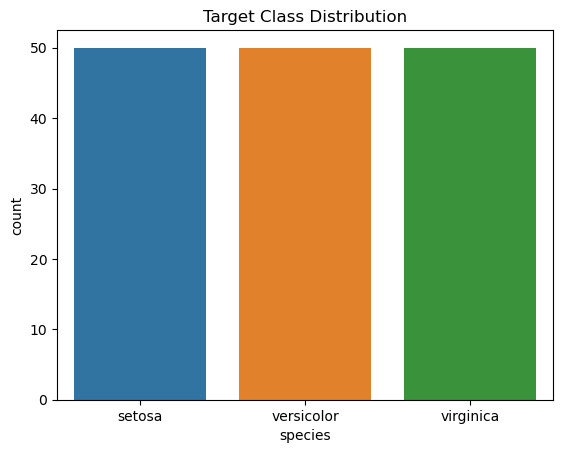

c:\Users\mohda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


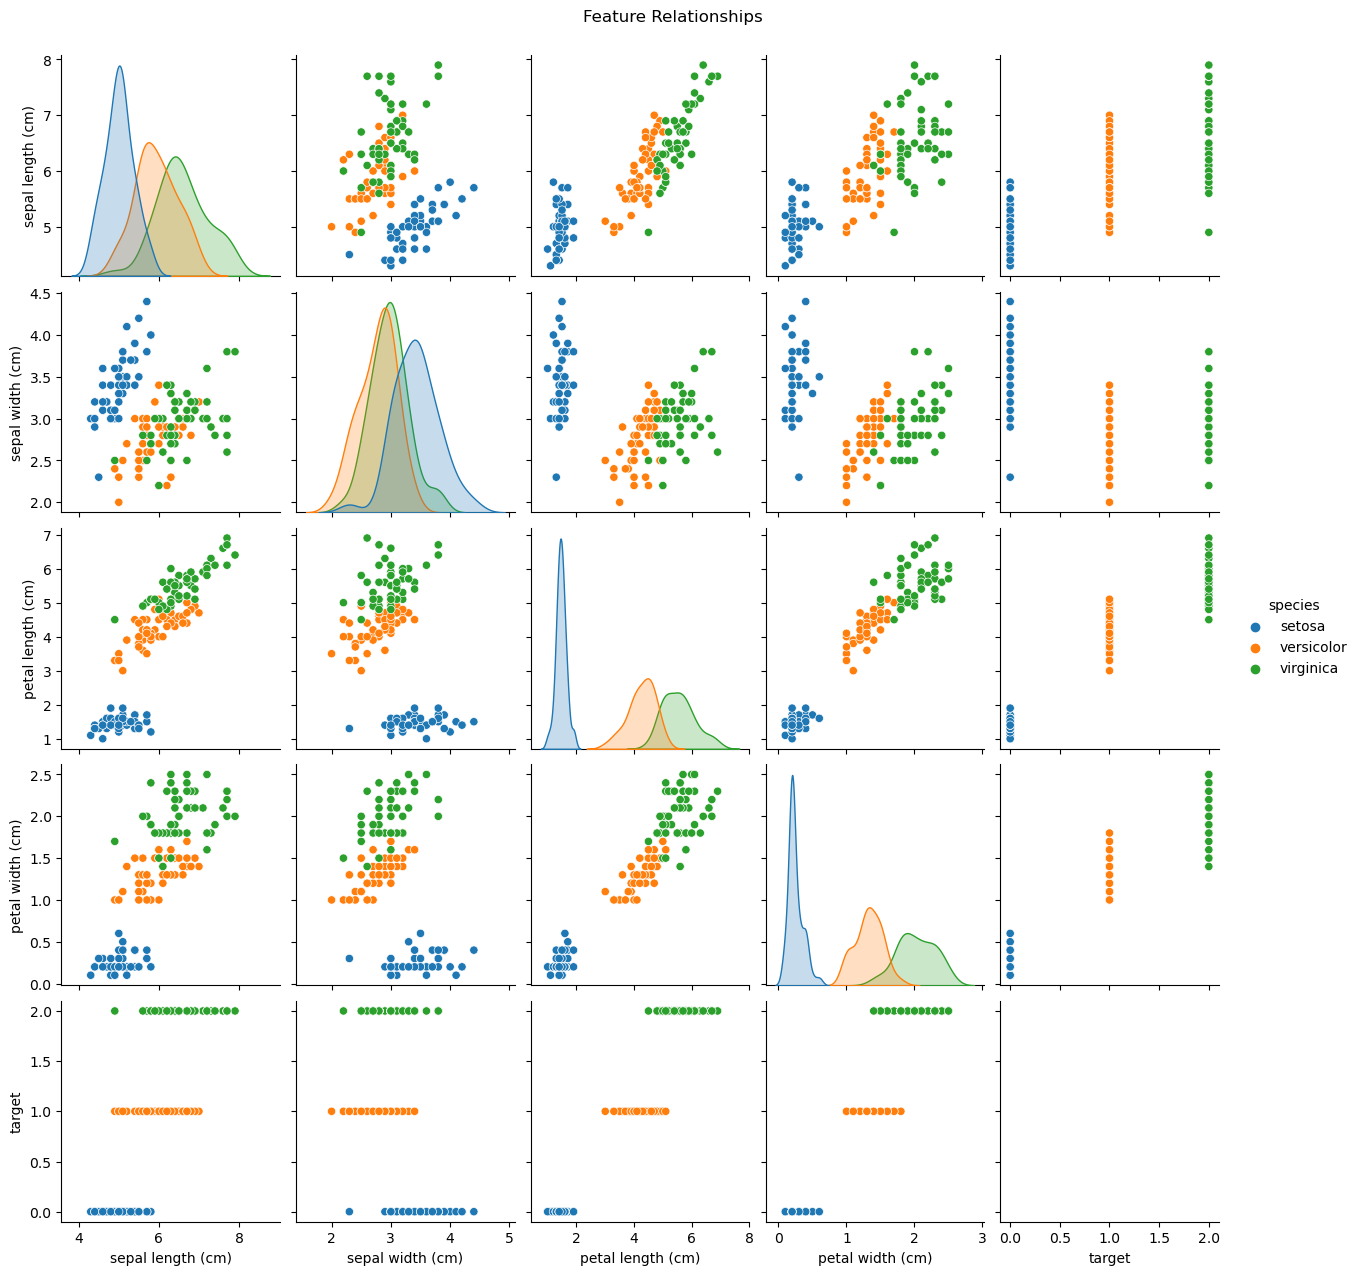

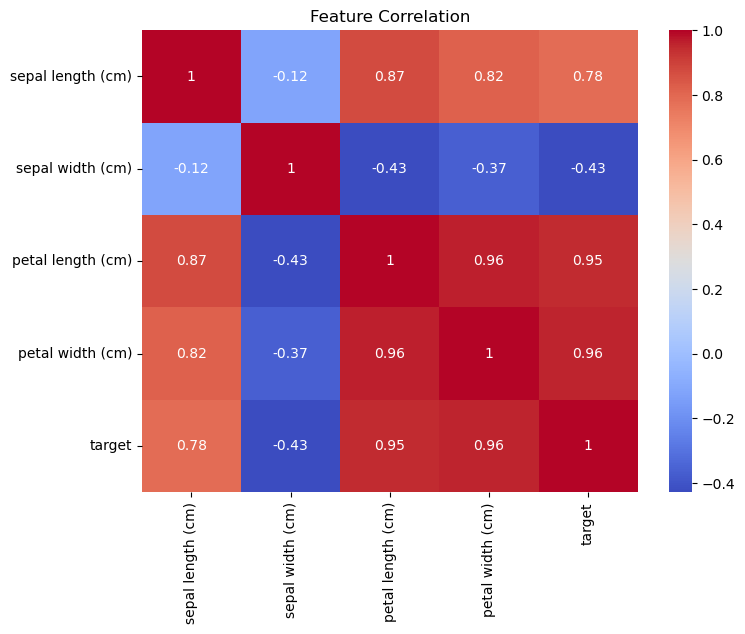

In [3]:
# Target distribution
sns.countplot(x="species", data=iris_df)
plt.title("Target Class Distribution")
plt.show()

# Pairplot for feature relationships
sns.pairplot(iris_df, hue="species", diag_kind="kde")
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop(columns="species").corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [4]:
# Select the most relevant features based on EDA
selected_features = ["petal length (cm)", "petal width (cm)"]
X = iris_df[selected_features]
y = iris_df["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with K=3: {accuracy:.2f}")


Accuracy with K=3: 0.97


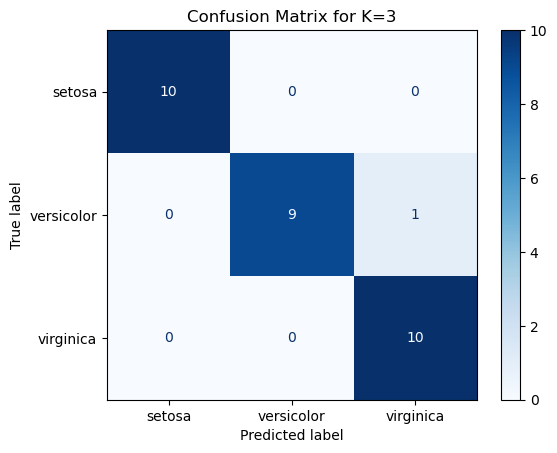

In [6]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for K=3")
plt.show()


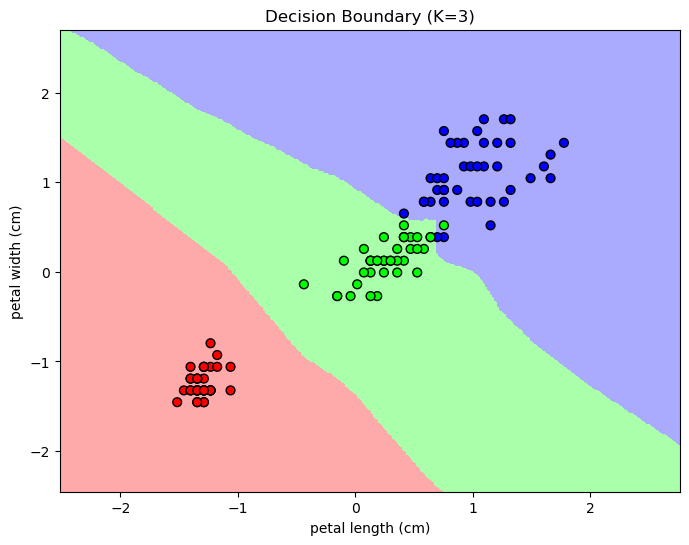

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=40)
    plt.title(title)
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()


plot_decision_boundary(X_train_scaled, y_train, knn, "Decision Boundary (K=3)")


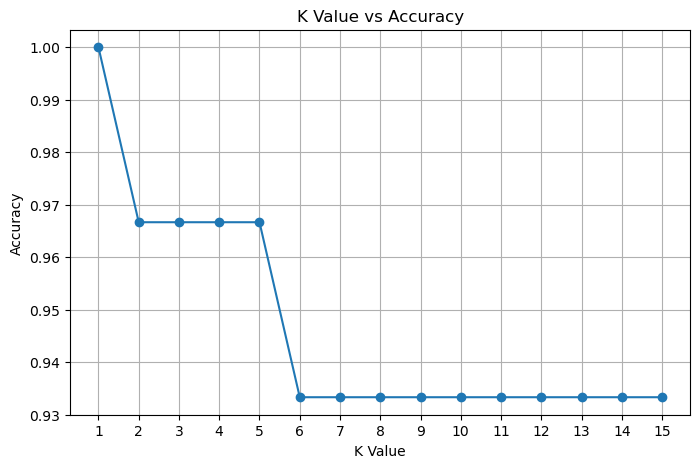

Best accuracy = 1.00 at K = 1


In [8]:
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o")
plt.xticks(k_values)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K Value vs Accuracy")
plt.grid(True)
plt.show()

print(f"Best accuracy = {max(accuracies):.2f} at K = {k_values[np.argmax(accuracies)]}")
